In [1]:
import pandas as pd
import pickle

In [2]:
%%time
june = pd.read_pickle('../data/june.pkl')
june.head()

Wall time: 4.61 s


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,Jump
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,Jump
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,Jump
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,Jump
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,Jump


In [3]:
june.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.5+ GB


In [4]:
june.isnull().sum()##CHARGE LEVEL COLUMN HAS 285 NULLS

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    285
companyname      0
dtype: int64

In [5]:
june.companyname.unique()

array(['Jump', 'Bird', 'Bolt', 'Gotcha', 'Spin', 'Lime', 'Lyft'],
      dtype=object)

In [6]:
june.sumdid.unique()

array(['Powered93627c35-0f62-5b81-a78d-75a4a92ecf47',
       'Powered17715097-e8a0-5494-a5ab-9b625796607d',
       'Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7', ...,
       'Powered749778', 'Powered211807', 'Powered255293'], dtype=object)

In [7]:
june_group=june.groupby(['companyname'])['sumdid'].nunique()

In [8]:
june_group.sort_values

<bound method Series.sort_values of companyname
Bird      2910
Bolt       333
Gotcha     223
Jump      1036
Lime      1455
Lyft      1152
Spin       713
Name: sumdid, dtype: int64>

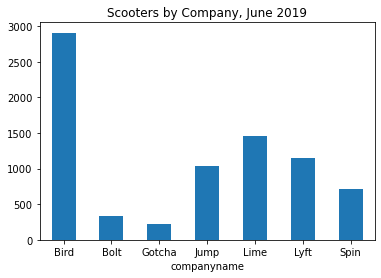

In [9]:
import matplotlib.pyplot as plt
june_group.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Scooters by Company, June 2019')
plt.show()

In [11]:
june_dead=june.loc[(june['chargelevel'] == 0.00)]['sumdid'].nunique()
june_dead

1358

In [13]:
june_dead_company = june_dead.value_counts(['companyname'])##NUMBER OF DEAD SCOOTERS BY COMPANY
june_dead_company 

AttributeError: 'int' object has no attribute 'value_counts'

In [17]:
june_dead_company=june.loc[(june['chargelevel'] == 0.00)].groupby('companyname')

In [18]:
june_dead_company

In [16]:
import matplotlib.pyplot as plt
june_dead.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Zero Charge Scooters by Company, June 2019')
plt.show()

AttributeError: 'int' object has no attribute 'plot'

In [ ]:
#filt= may_scooters['sumdid'] == ['PoweredLSWU7']
#may_scooters.loc[filt]['companyname'].value_counts()

june_dead.groupby('companyname')

#mayscoot =june
#filt=junedead

#filt= may_scooters['companyname'] == 3
#may_scooters.loc[filt]['sumdid'].value_counts()
#june.loc[june_dead]['sumdid'].value_counts()

#june_dead_company = june_dead.value_counts(['companyname'])##NUMBER OF DEAD SCOOTERS BY COMPANY
#june_dead_company 